In [ ]:
import pathlib as pl
import warnings
warnings.simplefilter("ignore")
from utils.analysis_utils import load_hyperparameters, fit_model_from_hyperparameters
# mpl.style.use('mystyle.mplstyle')
from utils.plotting_utils import  plot_all_models_from_hyperparameters, plot_data, plot_log_marginal_likelihoods_of_restarts

full_width = 5.5984252
page_height = 7.85
halfwidth = 2.645669

# Notebook for Plotting Predictions from Saved Hyperparameters and the Log Marginal Likelihoods of each Initialisation

Plot the predictions of each of the models for a given certain surface type, seed and number of points

In [10]:
surface_type = 'linear_relation'
test_type = 'two_observed_10_new'
n_new_points = 8
seed = 3
dataseed = 3

path = pl.Path.home()/ \
       f'Transfer_Learning_GP_Results/hyperparameters/hyperparameters_{surface_type}_{test_type}_{n_new_points}_points_seed_{seed}_dataseed_{dataseed}.pkl'

hyperparams = load_hyperparameters(path)

2023-06-21 11:51:32.546868: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
hyperparams['final_lml'] = [hyperparams['lmls'].to_numpy()[i][-1] for i in range(len(hyperparams))]

Plot the data generating function


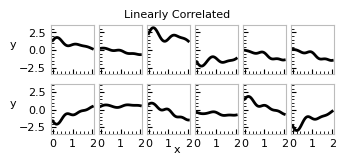

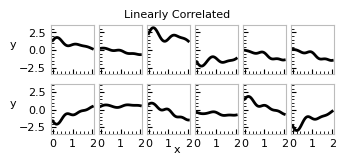

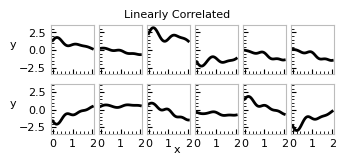

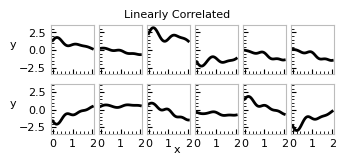

In [12]:
plot_data(hyperparams, surface_type, test_type, dataseed, seed, plot_data_points=False)

create each model from the saved hyperparameter

In [13]:


gps = {model_name: None for model_name in ['mo_indi', 'avg', 'lmc', 'lvmogp']}
for model_name in ['mo_indi', 'avg', 'lmc', 'lvmogp']:
       print(model_name)
       mod_df = hyperparams[hyperparams['model'] == model_name]
       gps[model_name] = fit_model_from_hyperparameters(mod_df)

mo_indi
build complete
assignment complete
avg
build complete
assignment complete
lmc
build complete
assignment complete
lvmogp
build complete
assignment complete
mo_indi
build complete
assignment complete
avg
build complete
assignment complete
lmc
build complete
assignment complete
lvmogp
build complete
assignment complete


Make predictions and plot each model

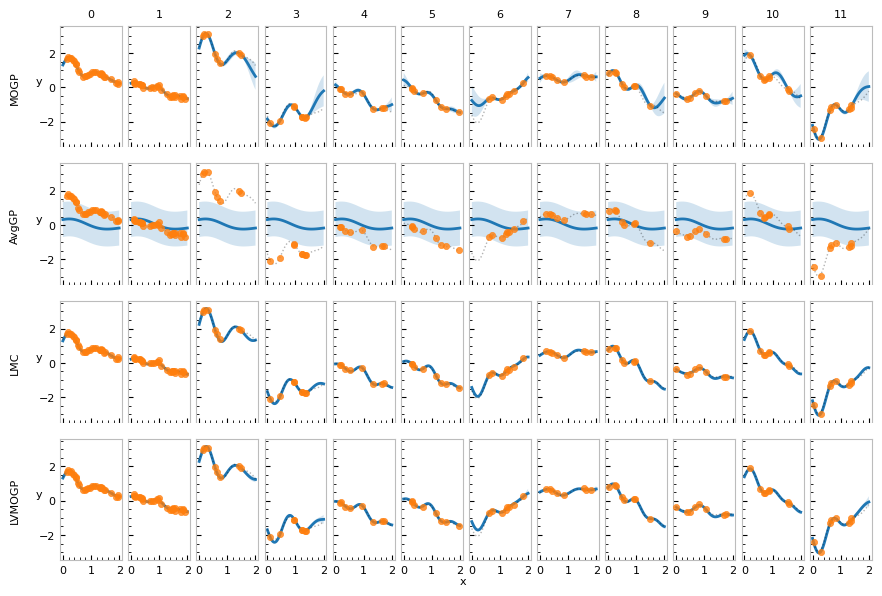

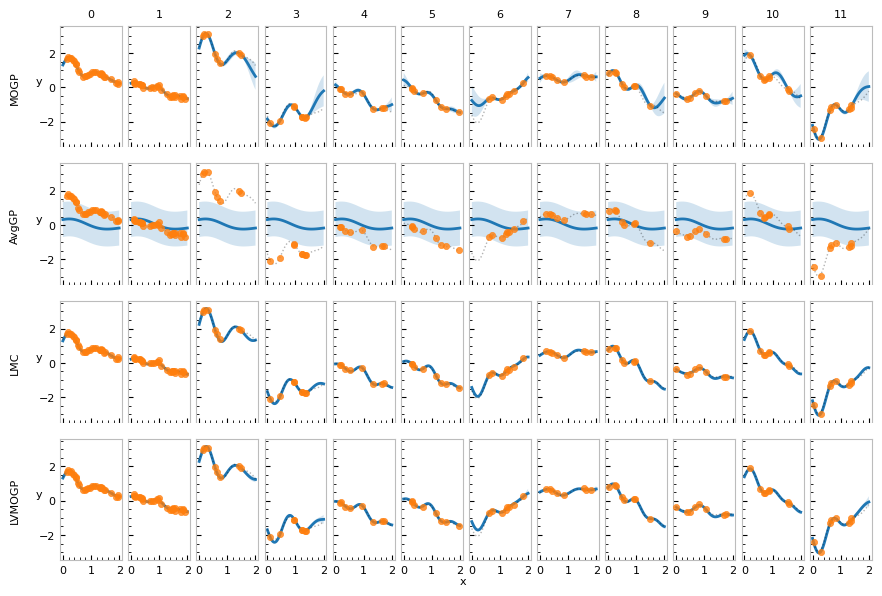

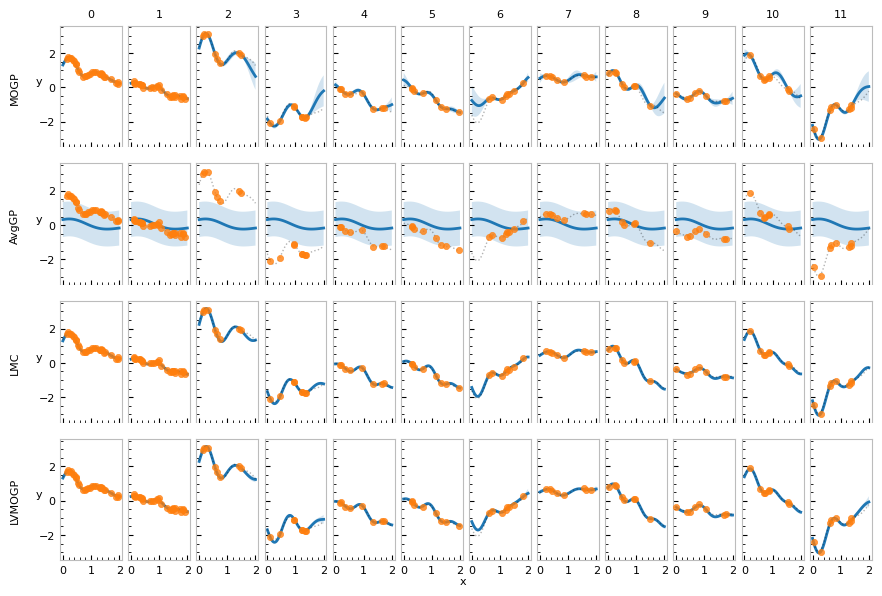

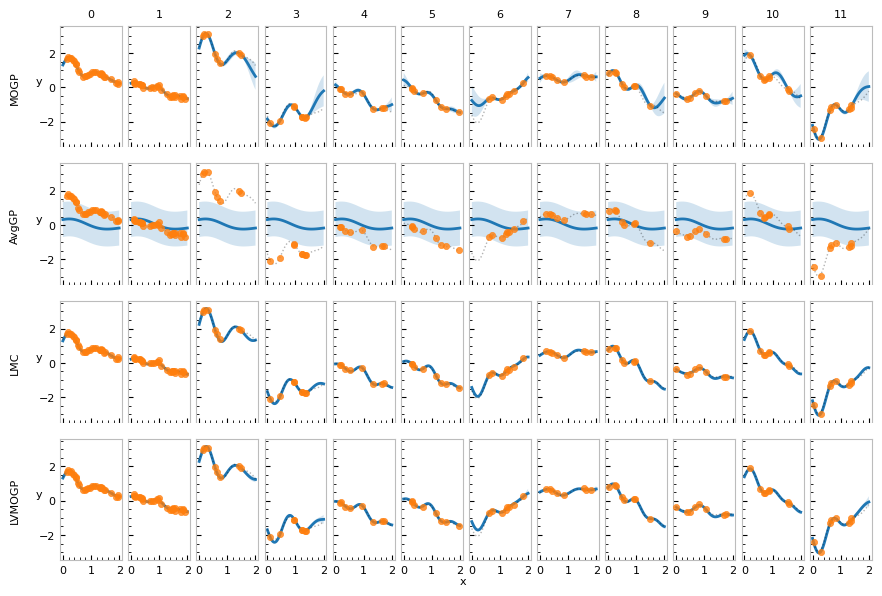

In [14]:
plot_all_models_from_hyperparameters(gps, hyperparams, plot_new_ys=False, save_fig=False, save_path=None)

For the log marginal likelihoods, first load all the hyperparameter pickles, then make plots

In [7]:
from utils.analysis_utils import load_all_hyperparameters

hyp_df = load_all_hyperparameters()
hyp_df['final_lml'] = [hyp_df['lmls'].to_list()[i][-1] for i in range(len(hyp_df))]

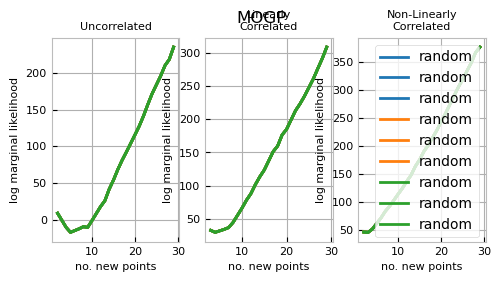

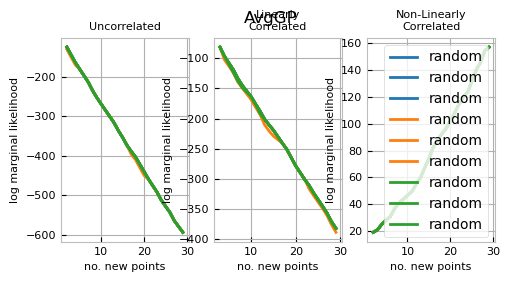

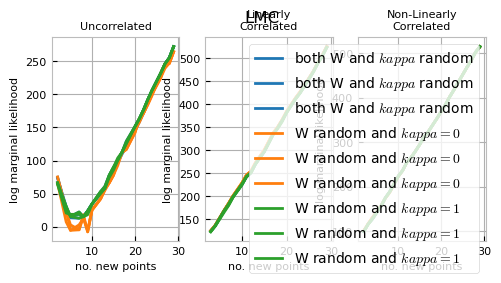

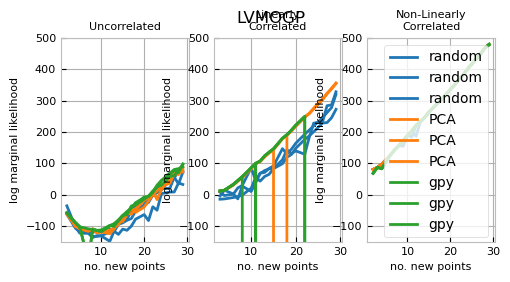

In [8]:
import os
import matplotlib.pyplot as plt
seed = 2
data_seed = 3

plot_log_marginal_likelihoods_of_restarts(hyp_df, seed, data_seed, save=True, path=pl.Path(os.getcwd())/'plots',
                                          file_name=f'log_marginal_likelihoods')
plt.show()